## Instalando dependências

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install math

ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math


## Importando bibliotecas

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math


# Questão 1
Dado $𝑓: \mathbb{𝑅} → \mathbb{𝑅}$ procura-se 𝑟 tal que 𝑓(𝑟) = 0. Para isso foram aplicados métodos iterativos que produzem uma sequência $(x_k)$ que, idealmente, converge para 𝑟. Adota-se como critérios de parada: $$|x_{k+1} - x_k| < ϵ, ou$$ $$|f(x_{k+1})| < τ$$
com $ϵ = \tau = 10^{-5}$.

## b) Constantes

In [ ]:
epslon = 10**(-5)
tau = 10**(-5)
max_iteracoes = 200

## Definindo a função $$f(x) = cos(x) + \frac{1}{1+e^{-2x}}$$ e sua derivada $$f'(x) = -sen(x) + \frac{2e^{-2x}}{(1+e^{-2x})^2}$$

In [ ]:
def f(x):
  '''
  Função da questão 1
  '''
  return math.cos(x)+1.0/(1.0+np.exp(-2.0*x))

In [ ]:
def derivada_f(x):
  '''
  Derivada da função acima para método do ponto falso
  '''
  return -math.sin(x)+(2.0*np.exp(-2.0*x))/((1.0+np.exp(-2.0*x)))**2

## Função para método do ponto fixo $$ϕ(x) = arccos(- \frac{1}{1 + e^{-2x}})$$

In [ ]:
def phi(x):
  '''
  Função do método do ponto fixo
  '''
  val = -1.0/(1.0 + math.exp(-2.0*x))
  val = max(-1.0, min(1.0, val))
  return math.acos(val)

## Método da bissecção

Pelo teorema do valor intermediário:

Se 𝑓 é contínua em [𝑎, 𝑏] e $𝑓(𝑎) \cdot 𝑓(𝑏) < 0$ então $$\exists r \in (𝑎, 𝑏) | f(r) = 0$$

A bissecção define $𝑐 = \frac{𝑎 + 𝑏}{2}$ e substitui o extremo cuja imagem tem o mesmo sinal de 𝑓(𝑐).

Após 𝑛 iterações o comprimento do intervalo é $\frac{𝑏 − 𝑎}{2^n}$. Para um erro absoluto menor que $ϵ$, ou seja, $|x_n - r| \leq \frac {b - a}{2^{n+1}}$:
$$𝑛 \geq ⌈\frac{log_2(𝑏 − 𝑎)}{𝜀}⌉$$

Portanto a convergência é linear (taxa de $\frac{1}{2}$ por iteração no comprimento do intervalo).

In [ ]:
def bisseccao(a,b):
  '''
  Aplicação do método da bissecção
  '''
  fa, fb = f(a), f(b)
  iteracoes = 0
  while (b-a)/2.0 > epslon and iteracoes < max_iteracoes:
      c = (a+b)/2.0
      fc = f(c)
      if fc == 0 or (b-a)/2.0 < epslon:
          return c, fc, iteracoes+1
      iteracoes += 1
      if fa * fc < 0:
          b = c
          fb = fc
      else:
          a = c
          fa = fc
  c = (a+b)/2.0
  return c, f(c), iteracoes

## Método da posição falsa

Usa-se um ponto de interseção da reta que liga (𝑎, 𝑓(𝑎)) e (𝑏, 𝑓(𝑏)) com o eixo 𝑥:$$x = \frac{a \cdot f(b) - b \cdot f(a)}{f(b) - f(a)}$$

Substitui-se um dos extremos (aquele que possuir um sinal igual à nova aproximação) de forma similar à bissecção. Para a convergência também é necessário que 𝑓 seja contínua.

In [ ]:
def pos_falsa(a,b):
  '''
  Aplicação do método da posição falsa
  '''
  fa, fb = f(a), f(b)
  iteracoes = 0
  x_old = a
  while iteracoes < max_iteracoes:
      x = (a*fb - b*fa)/(fb - fa)
      fx = f(x)
      iteracoes += 1
      if abs(fx) < epslon or abs(x - x_old) < epslon:
          return x, fx, iteracoes
      x_old = x
      if fa * fx < 0:
          b = x
          fb = fx
      else:
          a = x
          fa = fx
  return x, fx, iteracoes

## Aplicação do método do método do ponto fixo

Pelo teorema da convergência do método do ponto fixo, seja I um intervalo que contem um ponto fixo ξ de ϕ. Se vale que:

i) ϕ e a sua derivada ϕ' são funçõoes continuas em I;

ii) $\exists M > 0$ tal que $|ϕ'(x)| ≤ M < 1, \forall x \in I$;

iii) $x_0 \in I$;

então a sequência $\{x_k\}$ gerada de ϕ (ou seja com $x_{k+1} = ϕ(x_k)$)
converge ao ponto fixo ξ, em que $(\lim \limits_{k \to ∞}{x_k} = ξ)$.

Deve-se transformar 𝑓(𝑥) = 0 em 𝑥 = 𝜑(𝑥). Para garantir convergência localmente, basta ter ∣𝜑′(𝑥)∣ < 1 próximo da raiz. Portanto, ao propor
𝜑, deve-se checar a derivada. Para essa função f, propõe-se $$𝜑(𝑥) = arccos(- \frac{1}{1 +𝑒^{−2𝑥}})$$

Definindo $𝑢(𝑥) = \frac{−1}{1 + 𝑒^{−2𝑥}} \in (-1,0) \implies φ(x)=arccos(u(x))$.

Derivando: $$𝑢(𝑥) = −(1+𝑒^{−2𝑥})^{−1}$$
$$u'(x) = - \frac{2e^{-2x}}{(1 + e^{-2x})^2}$$

$\frac{𝑑}{𝑑𝑥} arccos(𝑢) = \frac {−𝑢′}{\sqrt{1 − 𝑢^2}}$. Assim $$𝜑′(𝑥) = \frac{2𝑒^{−2𝑥}}{(1+𝑒^{−2𝑥})^2 \cdot \sqrt {1 − 𝑢^2(𝑥)}}$$

Para que $∣𝜑′(𝑥)∣$ próximo da raiz (nesse caso: 𝑥 ≈ 𝜋) mostra-se que $∣𝜑′(𝜋)∣ \ll 1$ (valor da ordem de $10^{−2}$ — ver cálculo numérico no código). Com isso, verifica-se que a escolha de 𝜑 é aceitável localmente e a convergência é linear com fator 𝐿 = max∣𝜑′∣ próximo da raiz.

OBS: Como 𝑢(𝑥) está muito próximo de −1 para 𝑥 grande, o termo $\sqrt{1 − 𝑢^2}$ pode ficar pequeno, então é necessário para evitar erros por aproximação de pontos flutuantes em python, cortar os valores fora de [-1, 1] para evitar erros de domínio do arccos.

In [ ]:
def ponto_fixo(x0):
    iteracoes = 0
    x = x0
    while iteracoes < max_iteracoes:
        x_novo = phi(x)
        iteracoes += 1
        if np.abs(x_novo - x) < epslon or np.abs(x_novo) < tau:
            return x_novo, f(x_novo), iteracoes
        x = x_novo
    return x, f(x), iteracoes

## Método de Newton

Partindo da expansão de Taylor em torno de $𝑥_𝑘$: $$𝑓(𝑥_{𝑘 + 1}) ≈ 𝑓(𝑥_𝑘) + 𝑓′(𝑥_𝑘) \cdot (𝑥_{𝑘 + 1} − 𝑥_𝑘) + \frac{𝑓′′(𝜉)}{2} \cdot (𝑥_{𝑘 + 1} - 𝑥_𝑘)^2$$

Para tentar zerar 𝑓, coloca-se o termo linear igual a $−𝑓(𝑥_𝑘)$, obtendo: $$𝑥_{𝑘 + 1} = 𝑥_𝑘 − \frac{𝑓(𝑥_𝑘)}{f'(𝑥_𝑘)}$$

Pelo teorema da convergência do método de Newton, seja $𝑓 \in 𝐶^2$ (duas vezes continuamente diferenciável em um intervalo I que contém a raíz 𝜉), se $𝑓′(𝜉) \neq 0$ então existe um subintervalo $I' ⊆ I$ que contém 𝜉, tal que a sequência $\{x_k\}$ gerada pelo método converge a 𝜉 pelo menos quadraticamente $\forall x_0 \in I'$: $$|x_{𝑘 + 1} − 𝑟∣ ≈ 𝐶 \cdot ∣𝑥_𝑘 − 𝜉∣^2, 𝐶 = \frac{∣𝑓′′(𝜉)∣}{2∣𝑓′(𝜉)∣}$$

In [ ]:
def newton(x0):
    iteracoes = 0
    x = x0
    while iteracoes < max_iteracoes:
        d = derivada_f(x)
        if np.abs(d) < 1e-12:
            break
        x_novo = x - f(x)/d
        iteracoes += 1
        if abs(x_novo - x) < epslon:
            return x_novo, f(x_novo), iteracoes
        x = x_novo
    return x, f(x), iteracoes

## Método da Secante

Nesse método, é aplicado o método de Newton, porém aproxima-se a derivada pela diferença finita entre $𝑥_{𝑘 − 1}$ e $𝑥_𝑘$:
$$f'(x_k) ≈ \frac {f(x_k) - f(x_{k-1})}{x_k - x_{k-1}}$$

$$𝑥_{𝑘 + 1} = 𝑥_𝑘 − 𝑓(𝑥_𝑘) \cdot \frac {𝑥_𝑘 − 𝑥_{𝑘 − 1}}{𝑓(𝑥_𝑘) − 𝑓(𝑥_{𝑘 − 1})}$$

Pelo teorema da convergência do método da secante, sejam f e sua derivada f' contínuas num intervalo I que contém a raiz ξ de f. Se $f'(ξ) \neq 0$ e $x_0, x_1$ suficientemente próximos de ξ, então a sequência ${x_k}$ produzida pelo método converge pelo menos linearmente para ξ. Além disso, tem-se $$\lim \limits_{k \to ∞} \frac{|x_{k+1} − ξ|}{|x_k - ξ|^p} = c$$

Com 0 < c e $p = \frac{(1 + √5)}{2}$.
Ordem de convergência superlinear com ordem p ≈ 1.618 (proporção áurea)

In [ ]:
def secante(x0,x1):
    iteracoes=0
    x_ant = x0
    x = x1
    while iteracoes < max_iteracoes:
        f_ant = f(x_ant)
        fx = f(x)
        if np.abs(fx - f_ant) < 1e-14:
            break
        x_novo = x - fx*(x - x_ant)/(fx - f_ant)
        iteracoes += 1
        if abs(x_novo - x) < epslon:
            return x_novo, f(x_novo), iteracoes
        x_ant, x = x, x_novo
    return x, f(x), iteracoes

## Primeiro iremos achar os possíveis intervalos que possam conter a menor raíz positiva

In [ ]:
intervalos_possiveis = np.linspace(0, 5, 10001)
fs = [f(xx) for xx in intervalos_possiveis]
# Achando a mudança de sinal
mudanca_sinais = []
for i in range(len(intervalos_possiveis)-1):
    if fs[i] == 0 or fs[i]*fs[i+1] < 0:
        mudanca_sinais.append((intervalos_possiveis[i], intervalos_possiveis[i+1]))

mudanca_sinais

[(np.float64(3.076), np.float64(3.0765000000000002)),
 (np.float64(3.1990000000000003), np.float64(3.1995))]

## Como queremos a menor raíz positiva, busca-se o primeiro índice da mudança de sinais

In [ ]:
intervalo = mudanca_sinais[0]
a,b = intervalo
intervalo

(np.float64(3.076), np.float64(3.0765000000000002))

## Aplicando os métodos

In [ ]:
raiz_biss, fval_biss, iteracoes_b = bisseccao(a,b)
raiz_pto_falso, fval_pto_falso, iteracoes_pto_falso = pos_falsa(a,b)
# Chute inicial do ponto fixo escolhido no ponto médio do intervalo
meio = (a+b)/2.0
raiz_pto_fixo, fval_pto_fixo, iteracoes_pto_fixo = ponto_fixo(meio)
raiz_newton, fval_newton, iteracoes_newton = newton(meio)
raiz_sec, fval_sec, iteracoes_sec = secante(a,b)

resultados_q1 = {
    "Método": ["Bissecção","Posição Falsa","Ponto Fixo","Newton","Secante"],
    "ϕ ou f'":["- - -", "- - -", "ϕ(x) = arccos(-1/(1 + e^(-2x)))", "f'(x) = -sen(x) + 2*e^(-2x)/(1 + e^(-2x))²", "- - -"],
    "Chutes Iniciais": [f"[{a:.6f}, {b:.6f}]", f"[{a:.6f}, {b:.6f}]", f"x0 = {meio:.6f}", f"x0 = {meio:.6f}", f"x0, x1 = ({a:.6f}, {b:.6f})"],
    "Raíz Aproximada x~": [raiz_biss, raiz_pto_falso, raiz_pto_fixo, raiz_newton, raiz_sec],
    "f(x~)": [fval_biss, fval_pto_falso, fval_pto_fixo, fval_newton, fval_sec],
    "Erro majorante (est.)": [ (b-a)/2.0, abs(raiz_pto_falso - raiz_biss), abs(raiz_pto_fixo - raiz_biss), abs(raiz_newton - raiz_biss), abs(raiz_sec - raiz_biss)],
    "Iterações": [iteracoes_b, iteracoes_pto_falso, iteracoes_pto_fixo, iteracoes_newton, iteracoes_sec]
}

df_q1 = pd.DataFrame(resultados_q1)
df_q1

,Método,ϕ ou f',Chutes Iniciais,Raíz Aproximada x~,f(x~),Erro majorante (est.),Iterações
0,Bissecção,- - -,"[3.076000, 3.076500]",3.076414,4.324124e-07,0.000250,5
1,Posição Falsa,- - -,"[3.076000, 3.076500]",3.076421,-1.638041e-08,0.000007,1
2,Ponto Fixo,ϕ(x) = arccos(-1/(1 + e^(-2x))),x0 = 3.076250,3.076421,2.869807e-09,0.000007,3
3,Newton,f'(x) = -sen(x) + 2*e^(-2x)/(1 + e^(-2x))²,x0 = 3.076250,3.076421,2.786660e-14,0.000007,2
4,Secante,- - -,"x0, x1 = (3.076000, 3.076500)",3.076421,1.049916e-11,0.000007,2


## a) Analisando graficamente a função f e as aproximações dos métodos aplicados acima

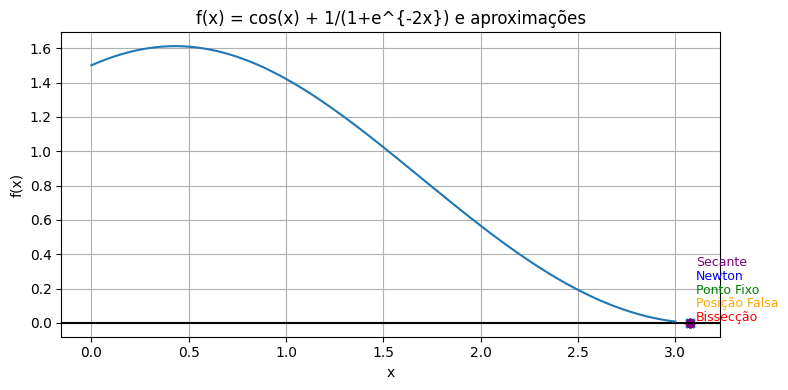

In [ ]:
plt.figure(figsize=(8,4))
xs_plot = np.linspace(0, 3, 1000)
ys_plot = [f(xx) for xx in xs_plot]
plt.axhline(0, color='k')
plt.plot(xs_plot, ys_plot)
plt.scatter([raiz_biss, raiz_pto_falso, raiz_pto_fixo, raiz_newton, raiz_sec],
            [fval_biss, fval_pto_falso, fval_pto_fixo, fval_newton, fval_sec],
            marker='x')
labels = ["Bissecção", "Posição Falsa", "Ponto Fixo", "Newton", "Secante"]
colors = ["red", "orange", "green", "blue", "purple"]

for (x, y, label, c, i) in zip([raiz_biss, raiz_pto_falso, raiz_pto_fixo, raiz_newton, raiz_sec],
                               [fval_biss, fval_pto_falso, fval_pto_fixo, fval_newton, fval_sec],
                               labels, colors, range(len(labels))):
    plt.scatter(x, y, color=c, label=label)
    plt.text(x + 0.03, y +0.01 +0.08*i, label, color=c, fontsize=9)



plt.title("f(x) = cos(x) + 1/(1+e^{-2x}) e aproximações")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.tight_layout()
plt.show()

# c) Comparação dos métodos

* Bissecção: A convergência é garantida com estimação direta do erro $ϵ \leq \frac {(b - a)}{2^{n+1}} $, porém ela é muito lenta, percebe-se que houve o maior número de iterações, além de apresentar o maior dentre os erros majorantes (todos os outros apresentaram empate nesse critério)
* Posição Falsa: Frequentemente mais rápida que bissecção e também possui convergência garantida, nesse caso foi a melhor aproximação pois houve apenas 1 iteração com o menor erro majorante, porém pode travar em alguns casos, quando um dos extremos fica fixo
* Ponto Fixo: Depende totalmente da escolha da função $\phi$, sendo necessário que $|\phi '| < 1$ e não possui convergência garantida. Aqui foi a segunda pior apresentando 3 iterações.
* Newton: Converge de forma quadrática localmente, o que a torna muito eficiente quando há uma boa aproximação inicial, porém não garante a convergência, pois pode divergir se $x_0$ for muito distante da raíz real ou se $|f'(x_k)|$ for muito pequeno. Nesse caso, como a aproximação inicial foi boa, ela apresentou empatado com a secante a segunda melhor convergência, com 2 iterações
* Secante: Geralmente mais rápida que os métodos lineares, mas não garante convergência. É uma boa alternativa a Newton (ainda que mais lenta) quando 𝑓′ não é facilmente calculável, diminuindo o custo por iteração. Porém nesse caso, houve empate entre esse método e o de Newton, com 2 iterações

# Questão 2

No sistema de equações
$$F =\begin{pmatrix} 16 x^4 + 16 y^4 + z^4 - 16 \\ x^2 + y^2 + z^2 - 3 \\ x^3 - y \end{pmatrix}$$

a) A jacobiana é dada por $$J(x,y,z) = \begin{pmatrix} \frac{∂f_1}{∂x} & \frac{∂f_1}{∂y} & \frac{∂f_1}{∂z} \\ \frac{∂f_2}{∂x} & \frac{∂f_2}{∂y} & \frac{∂f_2}{∂z}\\ \frac{∂f_3}{∂x} & \frac{∂f_3}{∂y} & \frac{∂f_3}{∂z} \end{pmatrix}$$

Nesse caso será $$J(x,y,z) = \begin{pmatrix} 64x^3 & 64y^3 & 4z^3 \\ 2x & 2y & 2z \\ 3x^2 & -1 & 0 \end{pmatrix}$$

In [19]:
def F_vec(vec):
  '''
  Função que retorna o vetor F
  '''
  x,y,z = vec
  return np.array([16*x**4 + 16*y**4 + z**4 - 16,
                    x**2 + y**2 + z**2 - 3,
                    x**3 - y])

In [24]:
def J_mat(vec):
  '''
  Função que retorna a matriz jacobiana
  '''
  x,y,z = vec
  # Jacobiana:
  # [64 x^3, 64 y^3, 4 z^3]
  # [2 x, 2 y, 2 z]
  # [3 x^2, -1, 0]
  return np.array([[64*x**3, 64*y**3, 4*z**3],
                    [2*x, 2*y, 2*z],
                    [3*x**2, -1, 0]])

## b) Transformando em um sistema linear de matrizes para aplicar um passo do método de Newton

Se $𝐹: \mathbb{𝑅}^𝑛 → \mathbb{𝑅}^𝑛$ é tal que deve-se achar 𝐹(𝑥) = 0, a expansão de Taylor em torno de $𝑥^{(𝑘)}$ dá: $$𝐹(𝑥^{(𝑘)}+ Δx) = 𝐹(𝑥^{(𝑘)}) + 𝐽_𝐹(𝑥^{(𝑘)}) \cdot Δx + 𝑂(∥ Δx∥^2)$$

Em que 𝐽_𝐹 é a Jacobiana. Tomando a aproximação linear e impondo $𝐹(𝑥^{(𝑘)} +  Δx) ≈ 0$ obtém-se o sistema linear para o incremento  Δx: $$𝐽_𝐹(𝑥^{(𝑘)}) Δx = −𝐹(𝑥^{(𝑘)})$$

Resolvendo para Δx: $$𝑥^{(𝑘+1)} = 𝑥^{(𝑘)} + Δx$$

Pelo teorema da convergência do método de Newton, se $𝐹 \in 𝐶^1$ (derivável uma vez), $𝐽_𝐹(𝑟)$ é invertível e $𝑥^{(0)}$ está suficientemente próximo de
𝑟, então Newton para sistemas também converge quadraticamente.

Nesse caso, a Jacobiana calculada analiticamente foi $$ 𝐽(𝑥, 𝑦, 𝑧) = \begin{pmatrix} 64𝑥^3 & 64𝑦^3 & 4𝑧^3 \\ 2𝑥 & 2𝑦 & 2𝑧 \\ 3𝑥^2 & −1 & 0 \end{pmatrix}$$

Na implementação, a cada iteração resolve-se $$𝐽 \cdot Δx = −𝐹$$

In [50]:
tol = 1e-15
max_iter = 50
def newton_sistemas(x0):
  '''
  Função que implementa o método de Newton para sistemas
  '''
  x = np.array(x0, dtype=float)
  historico = [x.copy()]
  for k in range(max_iter):
      J = J_mat(x)
      Fv = F_vec(x)
      try:
          delta = np.linalg.solve(J, -Fv)
      except np.linalg.LinAlgError:
          break
      x = x + delta
      historico.append(x.copy())
      if np.linalg.norm(delta, ord=2) < tol:
          return x, F_vec(x), k+1, historico
  return x, F_vec(x), len(historico)-1, historico

## c) Usando o método para encontrar uma aproximação $\tilde x$ da solução do sistema

(i) Usando $(x_0, y_0, z_0) = (1, 1, 1)$ como aproximação inicial

In [52]:
x0 = [1, 1, 1]
sol, Fsol, iteracoes_sistema, hist = newton_sistemas(x0)
iteracoes_sistema

7

(ii) Percebe-se que o método de Newton apresentou convergência rápida e estável, atingindo a solução exata do sistema em apenas 7 iterações (com a tolerância do $ϵ$ da máquinda $10^{-15}$). Esse comportamento é consistente com a ordem de convergência quadrática esperada para sistemas suaves e bem condicionados, confirmando a eficiência do método e a boa escolha do ponto inicial.

In [54]:
sol

array([0.877965760274298 , 0.6767569705178287, 1.3308554116212266])

(iii) A aproximação obtida após terminadas as iterações foi $(x,y,z) = (0.877965760274298, 0.6767569705178287, 1.3308554116212266)$

In [55]:
Fsol

array([0., 0., 0.])

(iv) Observa-se que o valor de F em $\tilde x$ foi retornado como 0, o que mostra que provavelmente o valor é bem menor do que o $ϵ$ da máquina, fazendo com que seja interpretado como 0

In [53]:
# Histórico das iterações e das suas respectivas aproximações
hist_arr = np.array(hist)
df_hist = pd.DataFrame(hist_arr, columns=["x","y","z"])
df_hist


,x,y,z
0,1.000000,1.000000,1.000000
1,0.929167,0.787500,1.283333
2,0.887075,0.693176,1.320865
3,0.878244,0.677195,1.330610
4,0.877966,0.676757,1.330855
5,0.877966,0.676757,1.330855
6,0.877966,0.676757,1.330855
7,0.877966,0.676757,1.330855
